# Deep Learning Project : Predicting Wine Types: Red or White?
## By Souha Ben Hassine & Ahmed Grati GL5

In this work, we'll use the wine quality data set from the UCI Machine Learning Repository, to predict the type of wine: white or red.

## 1/ Loading in the data
First, let's import the libraries:

In [1]:
import pandas as pd
import numpy as np

Now, let's load in the data:

In [2]:
#import the red wine dataset
red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
#import the white wine dataset
white_wine = pd.read_csv('winequality-white.csv', sep=';')
white_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


## 2/ Data Exploration:

###We will now combine both datasets, so we'll need to add another column to indicate whether it's a red or white wine. First, let's look into the number of entries we have in each dataset.

In [4]:
red_wine.info()
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

In [5]:
print(red_wine.describe())
print(white_wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

### Let's check whether the wine data contains duplicate rows:

In [6]:
print(sum(white_wine.duplicated()))
print(sum(red_wine.duplicated()))
# It's better to drop the duplicated rows, but it's outside the scoop of our project.

937
240


# 3/Visualizing the Data:
One variable that we found interesting at first sight is alcohol.  
### Alcohol

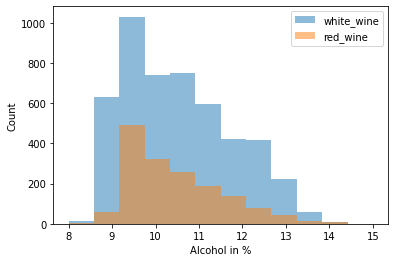

In [7]:
import matplotlib.pyplot as plt
bins = np.linspace(8, 15, 13)

plt.hist(white_wine['alcohol'], bins, alpha=0.5, label='white_wine')
plt.hist(red_wine['alcohol'], bins, alpha=0.5, label='red_wine')
plt.legend(loc='upper right')
plt.xlabel("Alcohol in %")
plt.ylabel("Count")
plt.show()




As you can see in the image above, the alcohol levels between the red and white wine are mostly the same: they have around 9% of alcohol. Of course, there are also a considerable amount of observations that have 10% or 11% of alcohol percentage.

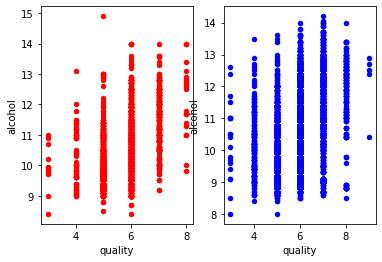

In [8]:
fig, axes = plt.subplots(1, 2)
red_wine.plot(x='quality', y='alcohol', kind='scatter', color="r",ax=axes[0])
white_wine.plot(x='quality', y='alcohol', kind='scatter', color="b",ax=axes[1])

Now let's look into the relation between the **sulphates** and the quality of the wine. Sulphates can cause people to have headaches, and it's wise to see if this influences the quality of the wine.
### Sulphate

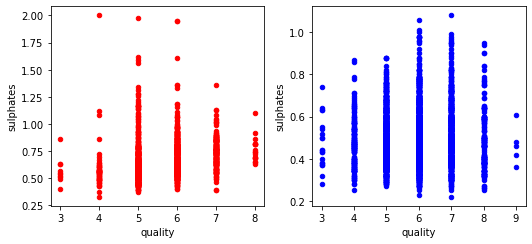

In [9]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
red_wine.plot(x='quality', y='sulphates', kind='scatter', color="r",ax=axes[0]) 
white_wine.plot(x='quality', y='sulphates', kind='scatter', color="b",ax=axes[1]) 

As we can see in the image above, the red wine seems to contain more sulfates than the white wine, which has fewer sulfates above 1 g/\(dm^3\). For the white wine, there only seem to be a couple of exceptions that fall just above 1 g/\(dm^3\), while this is definitely more for the red wines. This could maybe explain the general saying that red wine causes headaches.

Let's dive into more variables:
### Acidity
Great wines often balance out acidity, tannin, alcohol, and sweetness. In quantities of 0.2 to 0.4 g/L, volatile acidity doesn’t affect a wine’s quality. At higher levels, however, volatile acidity can give the wine a sharp, vinegary tactile sensation. Extreme volatile acidity signifies a seriously flawed wine. 



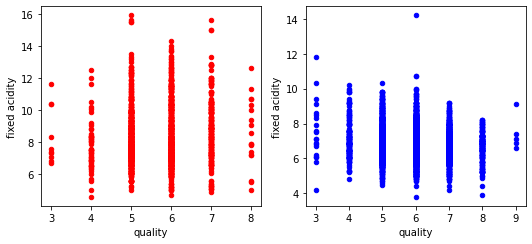

In [10]:
fig, axes = plt.subplots(1, 2)
red_wine.plot(x='quality', y='fixed acidity', kind='scatter', color="r",ax=axes[0]) 
white_wine.plot(x='quality', y='fixed acidity', kind='scatter', color="b",ax=axes[1]) 


### Total Sulfur Dioxide

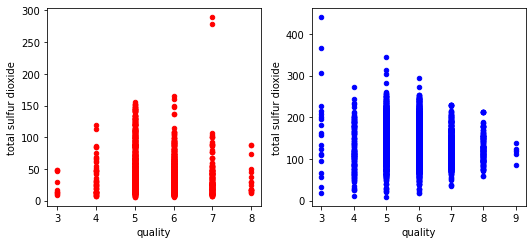

In [11]:
fig, axes = plt.subplots(1, 2)
red_wine.plot(x='quality', y='total sulfur dioxide', kind='scatter', color="r",ax=axes[0]) 
white_wine.plot(x='quality', y='total sulfur dioxide', kind='scatter', color="b",ax=axes[1]) 


### pH

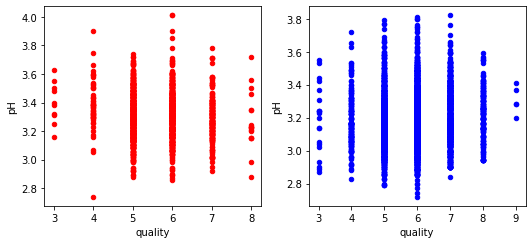

In [12]:
fig, axes = plt.subplots(1, 2)
red_wine.plot(x='quality', y='pH', kind='scatter', color="r",ax=axes[0])
white_wine.plot(x='quality', y='pH', kind='scatter', color="b",ax=axes[1])

Lets wrap up:


*   Some values are far apart.
*   There are no null values in the data sets.
*   Most wines that were included in the data set have around 9% of alcohol.
*   Red wine seems to contain more sulphates than the white wine, which has less sulphates above 1 g/\(dm^3\).
*   Most wines had a volatile acidity of 0.5 and below.


# 4/ Data Preprocessing and Analysis: 
First, let's combine both datasets in one, and visualize it.

In [13]:
print(red_wine.shape)
print(white_wine.shape)

(1599, 12)
(4898, 12)


We have 1599 red wine and 4898 white wine, let's create our combined dataset now. We'll assign 1 as type for red wine, and 0 for white wine.

In [14]:
type_red = np.repeat(1, 1599)
type_white = np.repeat(0, 4898)
red_wine['type'] = type_red
white_wine['type'] = type_white
wine = red_wine.append(white_wine, ignore_index=True) 
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


Text(0.5, 0, 'alcohol in %')

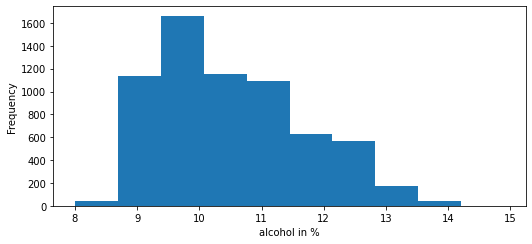

In [15]:
wine['alcohol'].plot(kind='hist')
plt.xlabel("alcohol in %")

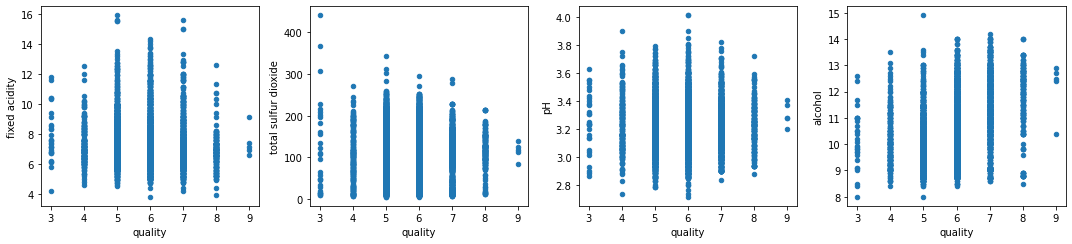

In [16]:
plt.rcParams["figure.figsize"] = [15, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 4)
wine.plot(x='quality', y='fixed acidity', kind='scatter',ax=axes[0]) 
wine.plot(x='quality', y='total sulfur dioxide', kind='scatter',ax=axes[1]) 
wine.plot(x='quality', y='pH', kind='scatter',ax=axes[2])
wine.plot(x='quality', y='alcohol', kind='scatter',ax=axes[3])

### Correlation Matrix

In [17]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


Some variables do correlate, such as density and residual sugar, volatile acidity and type, and free sulfur dioxide and total sulfur dioxide.
# 5/ Train and Test Sets:


In [18]:
from sklearn.model_selection import train_test_split
X = wine.drop('type',axis=1)

y = wine['type']

X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=42)

Like we noticed earlier, some of the values were kind of far apart. It might make sense to do some standardization here.



In [19]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)


# 6/ Model data:
We will now try and predict whether a wine is red or white by looking at its chemical properties. We're going to do a binary classification using Keras Sequential model.

In [20]:
from keras.models import Sequential
from keras.layers import Dense
# Define the model with 3 Dense layers only since our training dataset is relatively small
model=Sequential()
model.add(Dense(12,input_shape=(12,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# Fit and compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,batch_size=1,verbose=1)

Epoch 1/20
4352/4352 [==============================] - 7s 1ms/step - loss: 0.1015 - accuracy: 0.9669
Epoch 2/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0257 - accuracy: 0.9949
Epoch 3/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0229 - accuracy: 0.9959
Epoch 4/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0202 - accuracy: 0.9968
Epoch 5/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0189 - accuracy: 0.9963
Epoch 6/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0182 - accuracy: 0.9963
Epoch 7/20
4352/4352 [==============================] - 8s 2ms/step - loss: 0.0147 - accuracy: 0.9968
Epoch 8/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0146 - accuracy: 0.9968
Epoch 9/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0125 - accuracy: 0.9975
Epoch 10/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.013

In [21]:
# Get our model's info
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


Let's now predict some entries:

In [22]:
y_pred=model.predict(X_test)
print(np.round(y_pred[:5]))

68/68 [==============================] - 0s 1ms/step
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]]


And compare it to what it's supposed to be for clarity.

In [23]:
y_test[:5]

3103    0
1419    1
4761    0
4690    0
4032    0
Name: type, dtype: int64

Alright, looks like it did well already, let's now evaluate it as a whole.
# 7/ Model Evaluation:
Let's use some basic classification evaluation techniques:
### Accuracy

In [24]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

68/68 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.9953
[0.02584788016974926, 0.9953380227088928]


### Confusion Matrix
The confusion matrix, which is a breakdown of predictions into a table showing correct predictions and the types of incorrect predictions made. 

In [25]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, np.round(y_pred))

array([[1587,    1],
       [   9,  548]])

### Precision

In [26]:
precision_score(y_test, np.round(y_pred))

0.9981785063752276

### Recall

In [27]:
recall_score(y_test, np.round(y_pred))

0.9838420107719928

### F1-Score

In [28]:
f1_score(y_test, np.round(y_pred))

0.9909584086799277

### The Cohen’s kappa
The Kappa or Cohen’s kappa is the classification accuracy normalized by the imbalance of the classes in the data.

In [29]:
cohen_kappa_score(y_test, np.round(y_pred))

0.9878179265599869

We've achieved a pretty accurate model already! For future work with this dataset, we could add more hidden layers, or predict wine's quality instead of its type.